In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)

In [16]:
import pathlib

path = pathlib.Path("results/split")

values = np.load("results/data_concat/results_hamming_CNN_mw_1.7.npy", allow_pickle=True).item()
terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}

def convert_to_int(x):
    if x.dtype == str:
        return np.array([inv_terrains[t] for t in x])
    return x

res_cnn = []
res_mamba = []
for p in sorted(path.iterdir()):
    if 'CNN' in p.stem:
        res_cnn.append(np.load(p, allow_pickle=True).item())
    elif 'mamba' in p.stem:
        res_mamba.append(np.load(p, allow_pickle=True).item())

terrains = np.array([t for t in values["terrains"] if t != "MIXED"])
inv_terrains = {t: i for i, t in enumerate(terrains)}

In [32]:

cnn_acc = []
mamba_acc = []
for res in res_cnn:
    ypred = convert_to_int(res["pred"])
    ytest = convert_to_int(res["true"])
    fold_size = len(ypred)
    acc = []
    for k in range(5):
        pred = ypred[k * fold_size : (k + 1) * fold_size]
        true = ytest[k * fold_size : (k + 1) * fold_size]
        acc.append(accuracy_score(true, pred))
    cnn_acc.append(acc)

for res in res_mamba:
    ypred = convert_to_int(res["pred"])
    ytest = convert_to_int(res["true"])
    fold_size = len(ypred)
    acc = []
    for k in range(5):
        pred = ypred[k * fold_size : (k + 1) * fold_size]
        true = ytest[k * fold_size : (k + 1) * fold_size]
        acc.append(accuracy_score(true, pred))
    mamba_acc.append(acc)

print(f'{cnn_acc=}')
print(f'{mamba_acc=}')

cnn_acc=[[0.9073135409123824, nan, nan, nan, nan], [0.9082790248612117, nan, nan, nan, nan], [0.9056239440019309, nan, nan, nan, nan], [0.909968621771663, nan, nan, nan, nan], [0.909244508810041, nan, nan, nan, nan]]
mamba_acc=[[0.7971001267427122, nan, nan, nan, nan], [0.76808618504436, nan, nan, nan, nan], [0.7274862695395015, nan, nan, nan, nan], [0.6765779467680608, nan, nan, nan, nan], [0.6192648922686945, nan, nan, nan, nan]]


/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/william/Documents/Programming/Vulpi2021-terrain-deep-learning/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:

[0.90924451 0.90731354]


ValueError: 'yerr' (shape: (2,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (5,))

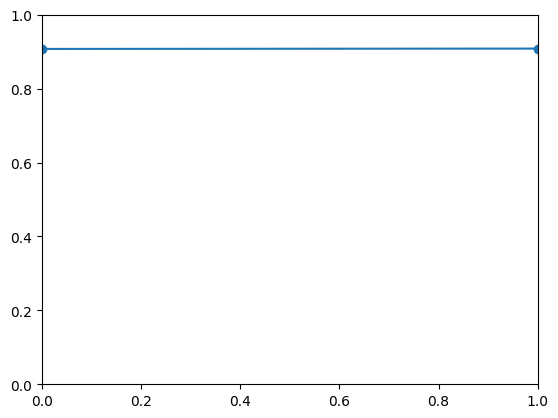

In [29]:
x = np.arange(len(cnn_acc))

error = q75, q25 = np.percentile(cnn_acc, [75 ,25])

plt.errorbar(x, cnn_acc, yerr=error, fmt='-o', label='cnn')
plt.errorbar(x, mamba_acc, yerr=error, fmt='-o', label='mamba')
plt.title('variable, symmetric error')

plt.show()